In [12]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [13]:
computers = pd.read_csv('computers.csv')
os = pd.read_csv('operating_systems.csv')
sales = pd.read_csv('sales.csv')
sales2 = pd.read_csv('sales2.csv')

display(computers)
display(os)
display(sales)
display(sales2)




,id_computer,brand,price
0,1,Apple,1200
1,2,Lenovo,700
2,3,Dell,850
3,4,HP,600
4,5,Asus,500
5,6,MSI,950


,id_os,name,price
0,0,No OS,0
1,1,Windows,150
2,2,Linux,100
3,3,macOS,200


,date,id_computer,id_os,quantity
0,2024-12-01,1,3,2
1,2024-12-02,2,1,1
2,2024-12-03,3,2,4


,date,id_computer,id_os,quantity
0,2024-12-03,4,0,3
1,2024-12-04,5,2,5
2,2024-12-05,6,1,2
3,2024-12-05,1,0,1


In [14]:
#конкатенація 
sales = pd.concat([sales, sales2], ignore_index=True)
print(sales)


         date  id_computer  id_os  quantity
0  2024-12-01            1      3         2
1  2024-12-02            2      1         1
2  2024-12-03            3      2         4
3  2024-12-03            4      0         3
4  2024-12-04            5      2         5
5  2024-12-05            6      1         2
6  2024-12-05            1      0         1


In [15]:
#злитття
data = pd.merge(sales, computers, left_on='id_computer', right_on='id_computer', how='inner')
data = pd.merge(data, os, on='id_os', how='inner')
data.rename(columns={'price_x': 'computer_price', 'price_y': 'os_price'}, inplace=True)
display(data)


,date,id_computer,id_os,quantity,brand,computer_price,name,os_price
0,2024-12-01,1,3,2,Apple,1200,macOS,200
1,2024-12-02,2,1,1,Lenovo,700,Windows,150
2,2024-12-03,3,2,4,Dell,850,Linux,100
3,2024-12-03,4,0,3,HP,600,No OS,0
4,2024-12-04,5,2,5,Asus,500,Linux,100
5,2024-12-05,6,1,2,MSI,950,Windows,150
6,2024-12-05,1,0,1,Apple,1200,No OS,0


In [16]:
def summary():
    result = data['computer_price'] * data['quantity'] + data['os_price'] * data['quantity']
    return result.sum()

print(f'сумарна вартість компютерів ддорівнює: {summary()}')

сумарна вартість компютерів ддорівнює: 15650


In [17]:


def day_sales():
    copy = data.copy()
    copy['date'] = pd.to_datetime(copy['date'], errors='coerce')
    copy.set_index('date', inplace=True)
    
    daily_data = copy.groupby(['date', 'brand']).sum()

    daily_data['total_revenue'] = (
        daily_data['computer_price'] * daily_data['quantity'] +
        daily_data['os_price'] * daily_data['quantity']
    )

    total_daily_revenue = daily_data.groupby('date')['total_revenue'].sum()

    display(daily_data)
    print(total_daily_revenue)

    copy['total_revenue'] = (
        copy['computer_price'] * copy['quantity'] +
        copy['os_price'] * copy['quantity']
    )
    bar_graph(copy)

def bar_graph(copy):
    plt.bar(copy.index, copy['total_revenue'], color='green')  
    plt.xlabel('Дата')
    plt.ylabel('Вартість')
    plt.title('Вартість продажів за день')
    plt.show()



id_computer  id_os  quantity  computer_price     name  \
date       brand                                                           
2024-12-01 Apple             1      3         2            1200    macOS   
2024-12-02 Lenovo            2      1         1             700  Windows   
2024-12-03 Dell              3      2         4             850    Linux   
           HP                4      0         3             600    No OS   
2024-12-04 Asus              5      2         5             500    Linux   
2024-12-05 Apple             1      0         1            1200    No OS   
           MSI               6      1         2             950  Windows   

                   os_price  total_revenue  
date       brand                            
2024-12-01 Apple        200           2800  
2024-12-02 Lenovo       150            850  
2024-12-03 Dell         100           3800  
           HP             0           1800  
2024-12-04 Asus         100           3000  
2024-12-05 Apple          0           1200  
           MSI          150           2200

date
2024-12-01    2800
2024-12-02     850
2024-12-03    5600
2024-12-04    3000
2024-12-05    3400
Name: total_revenue, dtype: int64


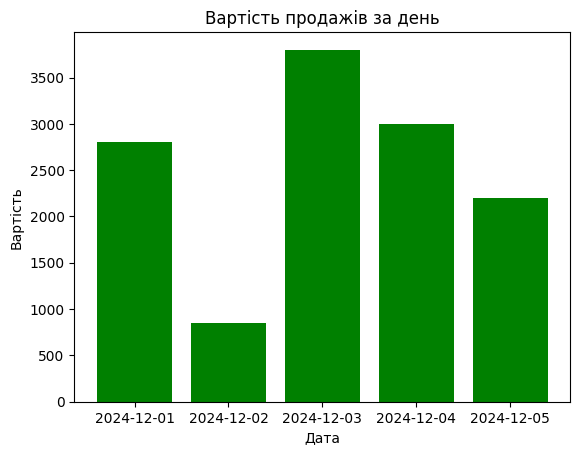

In [18]:
day_sales()


In [22]:
wd = widgets.Dropdown(
    options=data['name'].unique(),
    value='Windows',
    description='Назва ОС',
    disabled=False
)
def show_by_category(value):
    if value in data['name'].values:
        filtered_data = data[data['name'] == value]
        result = (filtered_data['os_price'] * filtered_data['quantity']).sum()
        print(f"Загальна виручка для {value}: {result}")


widget= widgets.interactive(show_by_category, value=wd)

display(widget)



interactive(children=(Dropdown(description='Назва ОС', index=1, options=('macOS', 'Windows', 'Linux', 'No OS')…

КЛАСИ 

In [20]:
df = pd.read_csv('operating_systems.csv')

class OS:
    def __init__(self, name, price):
        self._name = name
        self._price = price

    # геттер для назви
    @property
    def name(self):
        return self._name
    # сетер для назви
    @name.setter
    def name(self,value):
        self._name = value
    
    @property
    def price(self):
        return self._price
    
    @price.setter
    def price(self, value):
        if value < 0:
            raise ValueError("Ціна не може бути від'ємною!")
        self._price = value

os = [OS(row['name'],row['price']) for _, row in df.iterrows()]

for s in os:
    print(f'Назва: {s.name}, Ціна: {s.price}')
    

Назва: No OS, Ціна: 0
Назва: Windows, Ціна: 150
Назва: Linux, Ціна: 100
Назва: macOS, Ціна: 200


ТЕСТУВАННЯ

In [21]:
import unittest

class TestOS(unittest.TestCase):
    def setUp(self):
        self.os = OS('Windows', 100)

    def test_get_name(self):
        self.assertEqual(self.os.name, 'Windows')
    
    def test_set_name(self):
        self.os.name = 'Fedora'
        self.assertEqual(self.os.name, 'Fedora')

    def test_get_price(self):
        self.assertEqual(self.os.price, 100)

    def test_set_price(self):
        self.os.price = 20
        self.assertEqual(self.os.price, 20)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
